# Data Prep

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Walmart_Sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Checking missing values

In [5]:
df.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


## Checking for Duplicates

In [6]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


## Checking for Mixed Types

In [7]:
mixed_cols = []

for col in df.columns:
  types = df[col].map(type).nunique()
  if types > 1:
    mixed_cols.append(col)
print(mixed_cols)

[]


## Dealing for Outliers

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


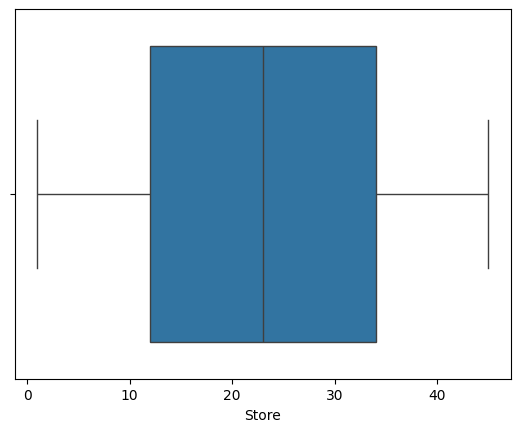

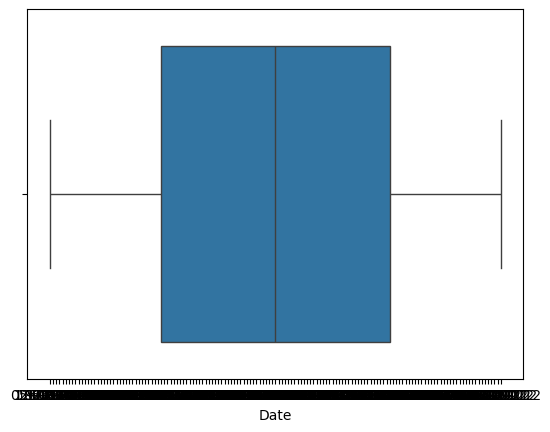

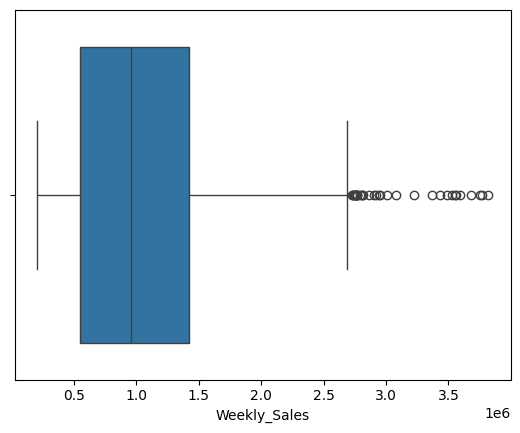

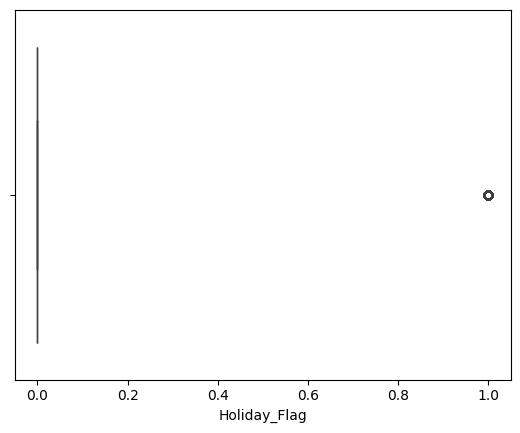

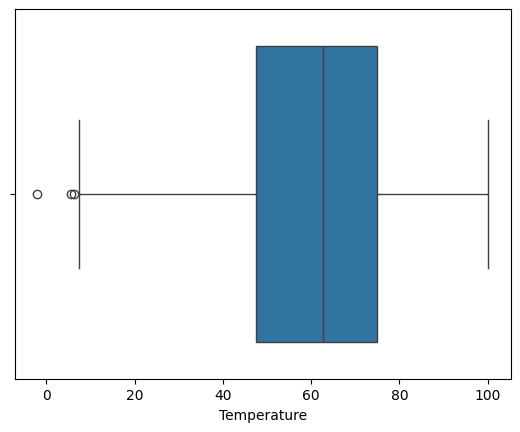

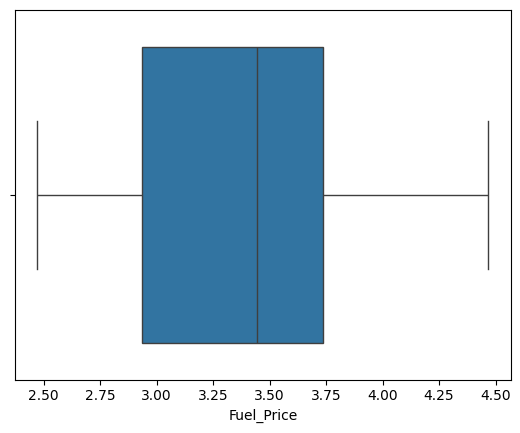

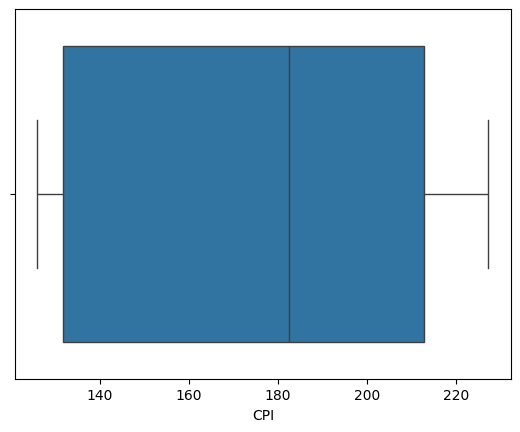

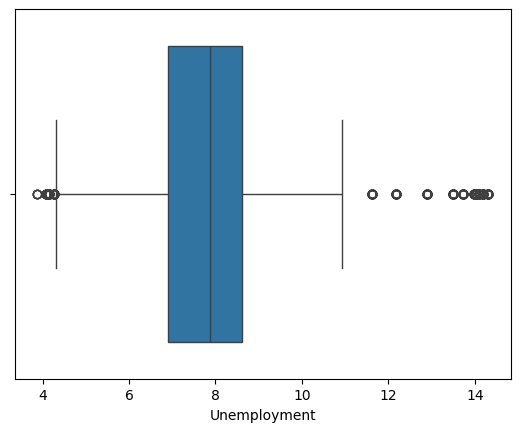

In [10]:
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.show()

In [11]:
## We can see that Weekly Sales has some outliers. Let's use the IQR Method

Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Weekly_Sales'] >= Q1 - 1.5*IQR) & (df['Weekly_Sales'] <= Q3 + 1.5*IQR)]

<Axes: xlabel='Weekly_Sales'>

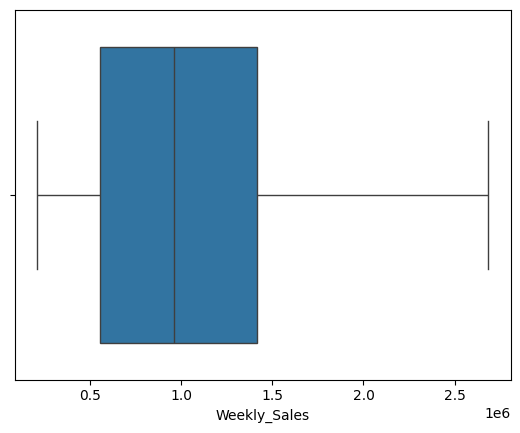

In [12]:
sns.boxplot(x=df['Weekly_Sales'])

# Linear Regression

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6401 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6401 non-null   int64  
 1   Date          6401 non-null   object 
 2   Weekly_Sales  6401 non-null   float64
 3   Holiday_Flag  6401 non-null   int64  
 4   Temperature   6401 non-null   float64
 5   Fuel_Price    6401 non-null   float64
 6   CPI           6401 non-null   float64
 7   Unemployment  6401 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 450.1+ KB


In [14]:
target = 'Weekly_Sales'
X = df.drop(columns=target)
y = df[target]

## Relationships

In [15]:
pip install phik

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix

interval columns not set, guessing: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


<Axes: >

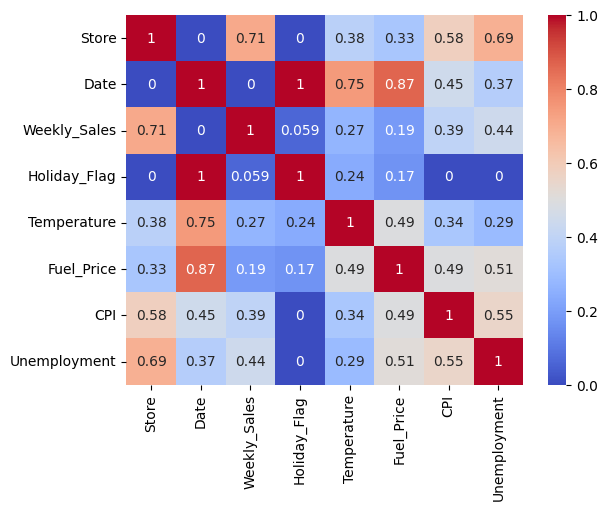

In [17]:
phik_corr = df.phik_matrix()
sns.heatmap(phik_corr, cmap="coolwarm", annot=True)

In [18]:
# We notice that Date has no correlation to Weekly_Sales, which makes sense. But instead of getting rid of it we can extract useful features from it like so:
df['Month'] = pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.month
df['Year'] = pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.year
df.drop(columns='Date', inplace=True)

# Don't forget to update X and y
X = df.drop(columns=target)
y = df[target]

In [19]:
df.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012
6434,45,760281.43,0,58.85,3.882,192.308899,8.667,10,2012


interval columns not set, guessing: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']


<Axes: >

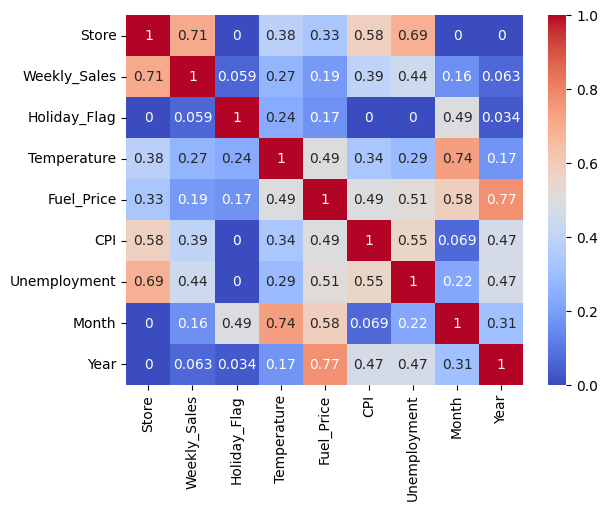

In [20]:
phik_corr = df.phik_matrix()
sns.heatmap(phik_corr, cmap='coolwarm', annot=True)

## Preprocessing Categorical and Numeric Features

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features
numeric_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values
    ('scaler', StandardScaler())                  # Optional, but good for consistent scale
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))       # Avoid dummy trap
])

# Combine into column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Fit

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
     ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Store', 'Holiday_Flag',
                                                   'Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment',
                                                   'Month', 'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [])])),
                ('regressor', LinearRegression())])

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
     ('regressor', LogisticRegression())
])

model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## Model Evaluation

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 430030.2877683094
RMSE: 515668.88437216124
R² score: 0.1626433984557527


In [36]:
# Get feature names after encoding
encoded_columns = model.named_steps['preprocessor'].get_feature_names_out()
coefs = model.named_steps['regressor'].coef_

# Combine into a readable table
importance = pd.DataFrame({
    'feature': encoded_columns,
    'coefficient': coefs
})
importance['abs_coef'] = importance['coefficient'].abs()
importance.sort_values(by='abs_coef', ascending=False, inplace=True)
importance.drop(columns='abs_coef', inplace=True)

print(importance.head(10))

             feature    coefficient
0         num__Store -186488.604448
4           num__CPI  -78292.128376
5  num__Unemployment  -41819.374362
3    num__Fuel_Price   25791.924664
7          num__Year  -25228.111217
6         num__Month   21526.412940
2   num__Temperature  -12519.818284
1  num__Holiday_Flag    7505.749772
